In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-06-10 17:42:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.251.111.207, 142.251.179.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   174MB/s    in 0.9s    

2024-06-10 17:42:16 (174 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
zip_ref=zipfile.ZipFile("10_food_classes_10_percent.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")


Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [ ]:
import datetime

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


In [ ]:
"""
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.

"""
def create_model(model_url, num_classes=10):
    feature_extractor_Layer=hub.KerasLayer(model_url,trainable=False,name="feature_extractor_Layer",input_shape=IMAGE_SHAPE+(3,))
    model=tf.keras.Sequential([feature_extractor_Layer,layers.Dense(num_classes,activation="softmax",name="output_layer")])
    return model


In [ ]:
resnet_model=create_model(resnet_url,num_classes=train_data_10_percent.num_classes)
resnet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics="accuracy")

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20240610-174236
Epoch 1/5
11/24 [============>.................] - ETA: 58s - loss: 2.3790 - accuracy: 0.2102 

KeyboardInterrupt: 

**mobilev2net-transfer learning for binary classification of ants and bees**

In [ ]:
!pip install wandb -qU

In [ ]:
import wandb

In [ ]:
wandb.login()

#*HYMENOPTERA BINARY CLAASSIFCATION*

In [ ]:
IMAGE_SHAPE=(224,224)

In [ ]:
dataset_name = 'thedatasith/hymenoptera'
zip_name = dataset_name.split('/')[-1]

!kaggle datasets download -d {dataset_name}
!unzip -q ./{zip_name}.zip -d ~/Dataset



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("hymenoptera.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath,dirname,filename in os.walk("hymenoptera"):
  print(f"There are this many {len(dirname)} directories many {len(filename)} files in {dirpath} ")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir="hymenoptera/train/"
val_dir="hymenoptera/val/"
print("train_dir is ",train_dir)
train_data=train_datagen.flow_from_directory(train_dir,batch_size=BATCH_SIZE,target_size=IMAGE_SHAPE,class_mode="binary")
test_data=test_datagen.flow_from_directory(val_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

In [ ]:
i=5
for images in train_data:
  if (i==0):
    break
  print("images",images)
  i=i-1

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

num_classes=2
m2=tf.keras.Sequential([
    hub.KerasLayer("https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/100-224-feature-vector/1",trainable=False,input_shape=IMAGE_SHAPE+(3,)),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])


In [ ]:
m2.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
import datetime
os.makedirs("log_file",exist_ok=True)
history=m2.fit(train_data,steps_per_epoch=len(train_data),epochs=3,validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback(dir_name="log_file", # save experiment logs here
                                                                         experiment_name="mobilenet")])


In [ ]:
m2_history = m2.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
experiment_name="mobilenet")])

In [ ]:
m2_history.history

# **Fine tuning in tesorflow **

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

In [ ]:
dir="10_food_classes_10_percent"
for dirpath,dirnames,filenames, in os.walk(dir):
  print(f"The are number of {len(dirnames)} directories number in {len(filenames)} in {dirpath}")

In [ ]:
import tensorflow as tf
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")


In [ ]:
train_data.class_names
len(train_data)

In [ ]:
for images,labels in train_data.take(1):
  print(f"images {images},labels {labels}".format(images,labels))

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=base_model(inputs)
print(f"x.shape {x.shape}")
x=tf.keras.layers.GlobalAveragePooling2D(name="globale_averag_pooling_layer")(x)
print(f"x.shape is {x.shape}")
outputs=tf.keras.layers.Dense(10,activation="softmax",name="out_put_layer")(x)
print(f"x.shape {x.shape}")
model0=tf.keras.Model(inputs,outputs)
model0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model0.summary()
model0_history=model0.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=create_tensorboard_callback("transfer_learning", "10_percent_feature_extract"))

In [ ]:
model0.summary()

In [ ]:
for num,layer in enumerate(base_model.layers):
  print(f"{num,layer}")

In [ ]:
plot_loss_curves(model0_history)

#global pooling layer
take the average of the input tensor between 2 middle layers

 replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.



In [ ]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
tf_tensor=tf.random.normal(input_shape)
output_layer=tf.keras.layers.GlobalAveragePooling2D()(tf_tensor)
print(f"input_shape{input_shape} output_layer {output_layer.shape}")

In [ ]:
output_layer=tf.reduce_mean(tf_tensor,axis=(1,2))
output_layer.shape,output_layer

#*1% TRAINING DATA  WITH AUGMENTATION*

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-06-10 17:43:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-10 17:44:00 (51.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
import zipfile
zip_ref=zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-06-10 17:44:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.207, 64.233.180.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   110MB/s    in 1.2s    

2024-06-10 17:44:04 (110 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import os
for dirpath,dirname,filename in os.walk("10_food_classes_1_percent"):
  print(f"the no of directories is {len(dirname)},no of files is{len(filename)} in the directory path {dirpath}")

the no of directories is 2,no of files is0 in the directory path 10_food_classes_1_percent
the no of directories is 10,no of files is0 in the directory path 10_food_classes_1_percent/train
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/ice_cream
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/chicken_wings
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/pizza
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/sushi
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/chicken_curry
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/grilled_salmon
the no of directories is 0,no of files is7 in the directory path 10_food_classes_1_percent/train/ramen
the no of directories is 0,no of files is7 in the directory p

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_ref=ImageDataGenerator(rescale=(1/255.))
test_ref=ImageDataGenerator(rescale=(1/255.))

#train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")


train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
data_augumentation=tf.keras.Sequential(
    [layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)],name="data_augumentation"
)


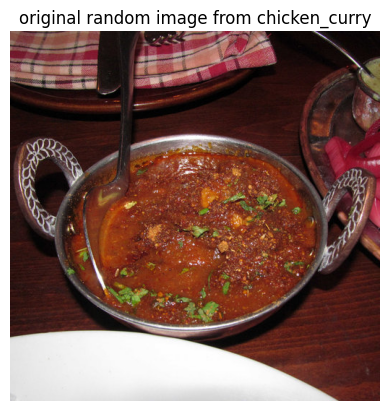

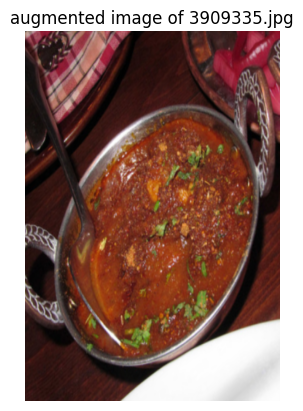

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
target_class=random.choice(train_data.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
image=mpimg.imread(random_image_path)
plt.imshow(image)
plt.title(f"original random image from {target_class}")
plt.axis(False)
augmented_image=data_augumentation(tf.expand_dims(image,axis=0))
augmented_image = tf.squeeze(augmented_image) / 255.0
plt.figure()
plt.imshow(augmented_image)
plt.title(f"augmented image of {random_image}")
plt.axis(False)
plt.show()

In [ ]:
def create_model(input_shape=(224,224,3),output_shape=10,learning_rate=0.001,training=False):
    input=tf.keras.layers.Input(shape=input_shape)
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable=False
    x=data_augumentation(input)
    x=base_model(x,training=False)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs=tf.keras.layers.Dense(output_shape,activation="softmax")(x)
    model=tf.keras.Model(input,outputs)
    return model
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])
model.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequen  (None, None, None, 3)     0         
 tial)                                                           
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810  

In [ ]:
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [ ]:
model_history=model.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),epochs=3,callbacks=create_tensorboard_callback("1 percent","efficientnet"))

Saving TensorBoard log files to: 1 percent/efficientnet/20240610-174425
Epoch 1/3
3/3 [==============================] - 143s 65s/step - loss: 2.3993 - accuracy: 0.0429 - val_loss: 2.2352 - val_accuracy: 0.1540
Epoch 2/3
3/3 [==============================] - 146s 72s/step - loss: 2.1563 - accuracy: 0.1714 - val_loss: 2.1179 - val_accuracy: 0.2452
Epoch 3/3
3/3 [==============================] - 133s 65s/step - loss: 2.0329 - accuracy: 0.3286 - val_loss: 2.0145 - val_accuracy: 0.3248


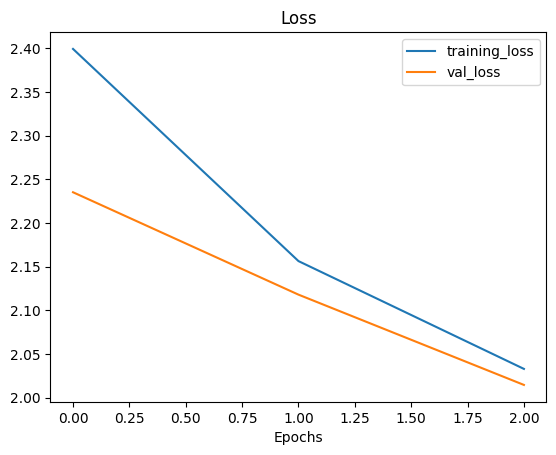

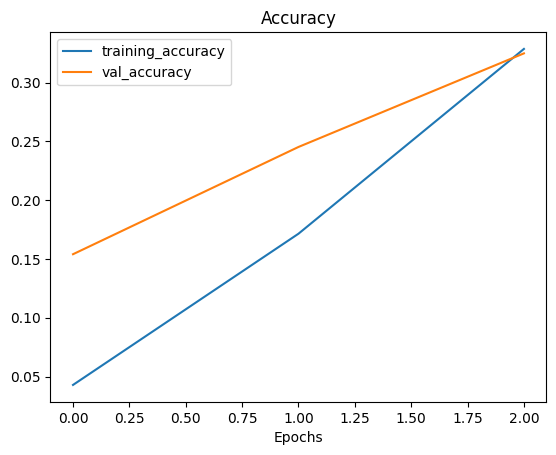

In [ ]:
plot_loss_curves(model_history)

In [ ]:
results=model.evaluate(test_data)
results

79/79 [==============================] - 127s 2s/step - loss: 2.0145 - accuracy: 0.3248


[2.0145301818847656, 0.3248000144958496]

In [ ]:
checkpoint_path="1_percent_model_checkpoint_weights/checkpoin.ckpt"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True,save_freq="epoch",verbose=1)

In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
model_history=model.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),epochs=3,callbacks=[create_tensorboard_callback("1 percent","efficientnet"),checkpoint_callback])

Saving TensorBoard log files to: 1 percent/efficientnet/20240610-175518
Epoch 1/3
3/3 [==============================] - ETA: 0s - loss: 1.7139 - accuracy: 0.6000
Epoch 1: val_loss improved from inf to 1.83431, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 146s 72s/step - loss: 1.7139 - accuracy: 0.6000 - val_loss: 1.8343 - val_accuracy: 0.4408
Epoch 2/3
3/3 [==============================] - ETA: 0s - loss: 1.6061 - accuracy: 0.6429
Epoch 2: val_loss improved from 1.83431 to 1.75581, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 125s 62s/step - loss: 1.6061 - accuracy: 0.6429 - val_loss: 1.7558 - val_accuracy: 0.4856
Epoch 3/3
3/3 [==============================] - ETA: 0s - loss: 1.4961 - accuracy: 0.7429
Epoch 3: val_loss improved from 1.75581 to 1.68167, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================

In [ ]:
result_1_percent=model.evaluate(test_data)

In [ ]:
result_1_percent

NameError: name 'result_1_percent' is not defined

In [ ]:
model_2=create_model()
model_2.load_weights(checkpoint_path)


In [ ]:
model_2.trainable=True
for layer in model_2.layers[:-10]:#last 10 layers freezed
  layer.trainable=False
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
for layer_no,layer in enumerate(model_2.layers):
  print(f"the layer no {layer_no} and layer is {layer} layer .trainable {layer.trainable }")

the layer no 0 and layer is <keras.src.engine.input_layer.InputLayer object at 0x7d311538fbe0> layer .trainable True
the layer no 1 and layer is <keras.src.engine.sequential.Sequential object at 0x7d3117412bc0> layer .trainable True
the layer no 2 and layer is <keras.src.engine.functional.Functional object at 0x7d310d3d65c0> layer .trainable True
the layer no 3 and layer is <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7d3115880850> layer .trainable True
the layer no 4 and layer is <keras.src.layers.core.dense.Dense object at 0x7d310dd956c0> layer .trainable True


In [ ]:
len(model_2.trainable_variables)

243

Every time you make a change to your models, you need to recompile them.

In our case, we're using the exact same loss, optimizer and metrics as before, except this time the learning rate for our optimizer will be 10x smaller than before (`0.0001` instead of Adam's default of `0.001`).

We do this so the model doesn't try to overwrite the existing weights in the pretrained model too fast. In other words, we want learning to be more gradual.


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-06-10 18:17:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  67.2MB/s    in 9.1s    

2024-06-10 18:17:37 (54.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_datagen=ImageDataGenerator(rescale=(1/255.))
test_datagen=ImageDataGenerator(rescale=(1/255.))
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data ))

Epoch 1/3


KeyboardInterrupt: 

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 136s 2s/step - loss: 1.6817 - accuracy: 0.5252


[1.6816697120666504, 0.5252000093460083]